# Import

In [189]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement de la données

In [190]:
chemin_fichier = "spaceship-titanic/train.csv"
df = pd.read_csv(chemin_fichier)
# print(df.head())

# Transformation de la données

In [191]:
# Remplir les valeurs manquantes par la médiane pour les colonnes numériques
for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

In [192]:
# Passenger_ID, séparation de la variable en deux variables Groupe_Numero
df[['Groupe', 'Numero']] = df['PassengerId'].str.split('_', expand=True)
df.drop('PassengerId', axis=1, inplace=True)
# print(df.head())

In [193]:
# HomePlanet, OneHotEncoding
df = pd.get_dummies(df, columns=['HomePlanet'])
# print(df.head())

In [194]:
# Cabin,  séparation de la variable en trois champs : pont/num/côté
df[['Pont', 'Num', 'Cote']] = df['Cabin'].str.split('/', expand=True)
df.drop('Cabin', axis=1, inplace=True)
# print(df.head())

In [195]:
# Destination, OneHotEncoding
df = pd.get_dummies(df, columns=['Destination'])
# print(df.head())

In [196]:
#Suppression de la colonne Name
df.drop('Name', axis=1, inplace=True)
print(df.head())

  CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0     False  39.0  False          0.0        0.0           0.0     0.0   
1     False  24.0  False        109.0        9.0          25.0   549.0   
2     False  58.0   True         43.0     3576.0           0.0  6715.0   
3     False  33.0  False          0.0     1283.0         371.0  3329.0   
4     False  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck  Transported Groupe Numero  HomePlanet_Earth  HomePlanet_Europa  \
0     0.0        False   0001     01             False               True   
1    44.0         True   0002     01              True              False   
2    49.0        False   0003     01             False               True   
3   193.0        False   0003     02             False               True   
4     2.0         True   0004     01              True              False   

   HomePlanet_Mars Pont Num Cote  Destination_55 Cancri e  \
0            False    B   0    

## Conversion des types

In [197]:
df['CryoSleep'].astype(bool)
df['Age'].astype(int)
df['VIP'].astype(bool)
df['RoomService'].astype(int)
df['FoodCourt'].astype(int)
df['ShoppingMall'].astype(int)
df['Spa'].astype(int)
df['VRDeck'].astype(int)
df['Transported'].astype(bool)
df['Groupe'] = pd.to_numeric(df['Groupe'], errors='coerce')
df['Numero'] = pd.to_numeric(df['Numero'], errors='coerce')
df['HomePlanet_Earth'].astype(bool)
df['HomePlanet_Europa'].astype(bool)
df['HomePlanet_Mars'].astype(bool)
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')
df['Destination_55 Cancri e'].astype(bool)
df['Destination_PSO J318.5-22'].astype(bool)
df['Destination_TRAPPIST-1e'].astype(bool)

# LabelEncoding : Vient attribuer un nombre unique a chaque catgeorie
# Création de l'encodeur
label_encoder = LabelEncoder()
# Fit et transform
df['Pont'] = label_encoder.fit_transform(df['Pont'])
df['Cote'] = label_encoder.fit_transform(df['Cote'])

#Affichage 
print(df.head())

  CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0     False  39.0  False          0.0        0.0           0.0     0.0   
1     False  24.0  False        109.0        9.0          25.0   549.0   
2     False  58.0   True         43.0     3576.0           0.0  6715.0   
3     False  33.0  False          0.0     1283.0         371.0  3329.0   
4     False  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck  Transported  Groupe  Numero  HomePlanet_Earth  HomePlanet_Europa  \
0     0.0        False       1       1             False               True   
1    44.0         True       2       1              True              False   
2    49.0        False       3       1             False               True   
3   193.0        False       3       2             False               True   
4     2.0         True       4       1              True              False   

   HomePlanet_Mars  Pont  Num  Cote  Destination_55 Cancri e  \
0            Fal

In [198]:
# Enregistrement du DataSet dans un csv
try:
    df.to_csv('spaceship-titanic/dataset.csv', index=False)
    print("Fichier enregistré avec succès.")
except Exception as e:
    print(f"Erreur lors de l'enregistrement du fichier : {e}")

Fichier enregistré avec succès.


In [199]:
# Compter le nombre total de lignes
total_rows = len(df)
print("Nombre total de lignes:", total_rows)

# Compter les lignes contenant au moins une valeur manquante
rows_with_na = df.isnull().any(axis=1).sum()
print("Nombre de lignes avec au moins une valeur manquante:", rows_with_na)

Nombre total de lignes: 8693
Nombre de lignes avec au moins une valeur manquante: 599


In [200]:
# Calcul du nombre de valeurs manquantes par colonne
missing_values_count = df.isnull().sum()

# Afficher les colonnes avec le nombre de valeurs manquantes
print("Nombre de valeurs manquantes par colonne:")
print(missing_values_count)

# Filtrer pour obtenir uniquement les colonnes avec des valeurs manquantes
columns_with_na = missing_values_count[missing_values_count > 0].index.tolist()

# Afficher uniquement les colonnes avec des valeurs manquantes
print("\nDataFrame avec uniquement les colonnes ayant des valeurs manquantes:")
print(df[columns_with_na])

Nombre de valeurs manquantes par colonne:
CryoSleep                    217
Age                            0
VIP                          203
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Transported                    0
Groupe                         0
Numero                         0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Pont                           0
Num                          199
Cote                           0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
dtype: int64

DataFrame avec uniquement les colonnes ayant des valeurs manquantes:
     CryoSleep    VIP     Num
0        False  False     0.0
1        False  False     0.0
2        False   True     0.0
3        False  False     0.0
4        False  False     1.0
...        ...    ...     ...
8688 

In [201]:
# Supprimer les lignes contenant des NaN
df = df.dropna()

In [202]:
# Séparation des features et de la cible
X = df.drop('Transported', axis=1)  # ou les colonnes que vous souhaitez inclure comme features
y = df['Transported']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle

In [203]:
# Créer une instance du modèle
model = LogisticRegression(max_iter=1000, tol=0.1)

# Entraîner le modèle
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, tol=0.1)

# Prédiction et évaluation

In [204]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision: {accuracy}")

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

Précision: 0.7953890489913544


# Visualisation des résultats

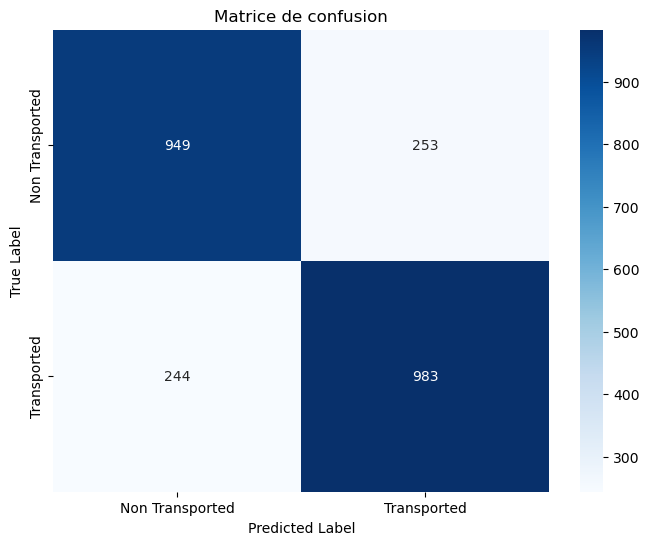

In [205]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non Transported', 'Transported'], yticklabels=['Non Transported', 'Transported'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de confusion')
plt.show()